# Create a Prediction function 

In the previous notebook we were able to use the retrained model to predict a 'severe' or 'moderate' car accident within an image.  We can take that code and create a predict function that we can call from any notebook.


Developer note:  code for prediction function taken from Prediction2.ipynb.  Prediction.ipynb uses Chris's boxes and extraction methods, but doesn't plot full box around car.

In [33]:
!pip install ultralytics
from ultralytics import YOLO
from PIL import Image


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Create a predict function


In [34]:
def predict(best_model_path, car_image_path):
    model = YOLO(best_model_path)
    results = model.predict(car_image_path)
    return results[0]

In [36]:
#In the photo place boxes listing name, probability around each car (object type)
def draw_boxes_image(result):
    print("inside draw boxes image")
    #Image.fromarray(result.plot()[:,:,::-1])


image 1/1 /opt/app-root/src/car-accident-detection/images/carImage1.jpg: 448x640 1 severe, 212.9ms
Speed: 1.6ms preprocess, 212.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


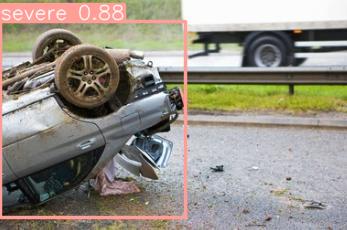

In [37]:
prediction_results = predict("models/best.pt", "images/carImage1.jpg")
Image.fromarray(prediction_results.plot()[:,:,::-1])
#draw_boxes_image(prediction_results, image)

## Extract the Predict function into a Python file
Now that we've got a working function, extract the prediction logic into a standalone python file, prediction.py in a predict function. Also, make sure requirements.txt is updated with any additional packages you've used and need for prediction.

## Test the function from your Python file
We can make sure the extraction worked properly by loading the function from our prediction.py file and testing it out to make sure it works the same.


image 1/1 /opt/app-root/src/car-accident-detection/images/carImage1.jpg: 448x640 1 severe, 220.1ms
Speed: 1.5ms preprocess, 220.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


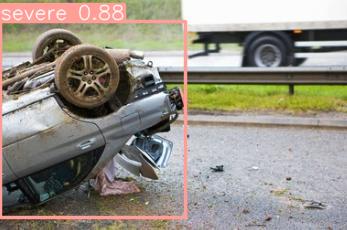

In [38]:
#after creating prediction.py, place predict function inside.  Now call predict method from within notebook

from prediction import predict

#image & model file locations.
car_image = "images/carImage1.jpg"
model_path = "models/best.pt"

#call predict function in prediction.py
prediction_results = predict(model_path, car_image)

#display image with boxes,class and probability
Image.fromarray(prediction_results.plot()[:,:,::-1])